# Poisson equation (vertical cases)
**21 September 2022 by MiniUFO**

---
[TOC]

---

## 1. Introduction
A streamfunction $\psi$ as well as vorticity $\zeta$ can also be defined in meridional ($y-z$) plane or zonal ($x-z$) plane.  In the meridional plane, $\psi$ is also named as **meridional overturning circulation**, and in the zonal plane,usually the equatorial plane, $\psi$ is also named as **Walker circulation**.

---
## 2. Example:

### 2.1 Meridional case
Here we first demonstrate the meridional case, in which meridional overturning streamfunction is inverted.  Note that we use `FiniteDiff` to compute the vorticity in the meridional section (i.e., $i$-component of vorticity vector).

In [1]:
import sys
sys.path.append('../../../')
import xarray as xr
import numpy as np
from xinvert import invert_Poisson, cal_flow, FiniteDiff

# load data
ds = xr.open_dataset('../../../Data/ZonalMean.nc')
v = ds.vm
w = ds.wm

# calculate vor in meridional plane
fd = FiniteDiff({'Z':'LEV', 'Y':'lat'}, BCs={'Z':'fixed','Y':'fixed'}, coords='lat-lon')
vor = fd.vort(v=v, w=w, components='i')

# invert streamfunction and flow
iParams = {
    'BCs'      : ['fixed', 'extend'],
    'undef'    : np.nan,
    'mxLoop'   : 5000,
    'tolerance': 1e-13,
}

sf = invert_Poisson(vor, dims=['LEV','lat'], coords='z-lat', iParams=iParams)
vs, ws = cal_flow(sf, dims=['LEV', 'lat'], coords='z-lat', BCs=iParams['BCs'])

{} loops 5000 and tolerance is 7.339510e-09


Plot the results:

C:\ProgramData\anaconda3\lib\site-packages\dask\array\core.py:1701: FutureWarning: The `numpy.column_stack` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


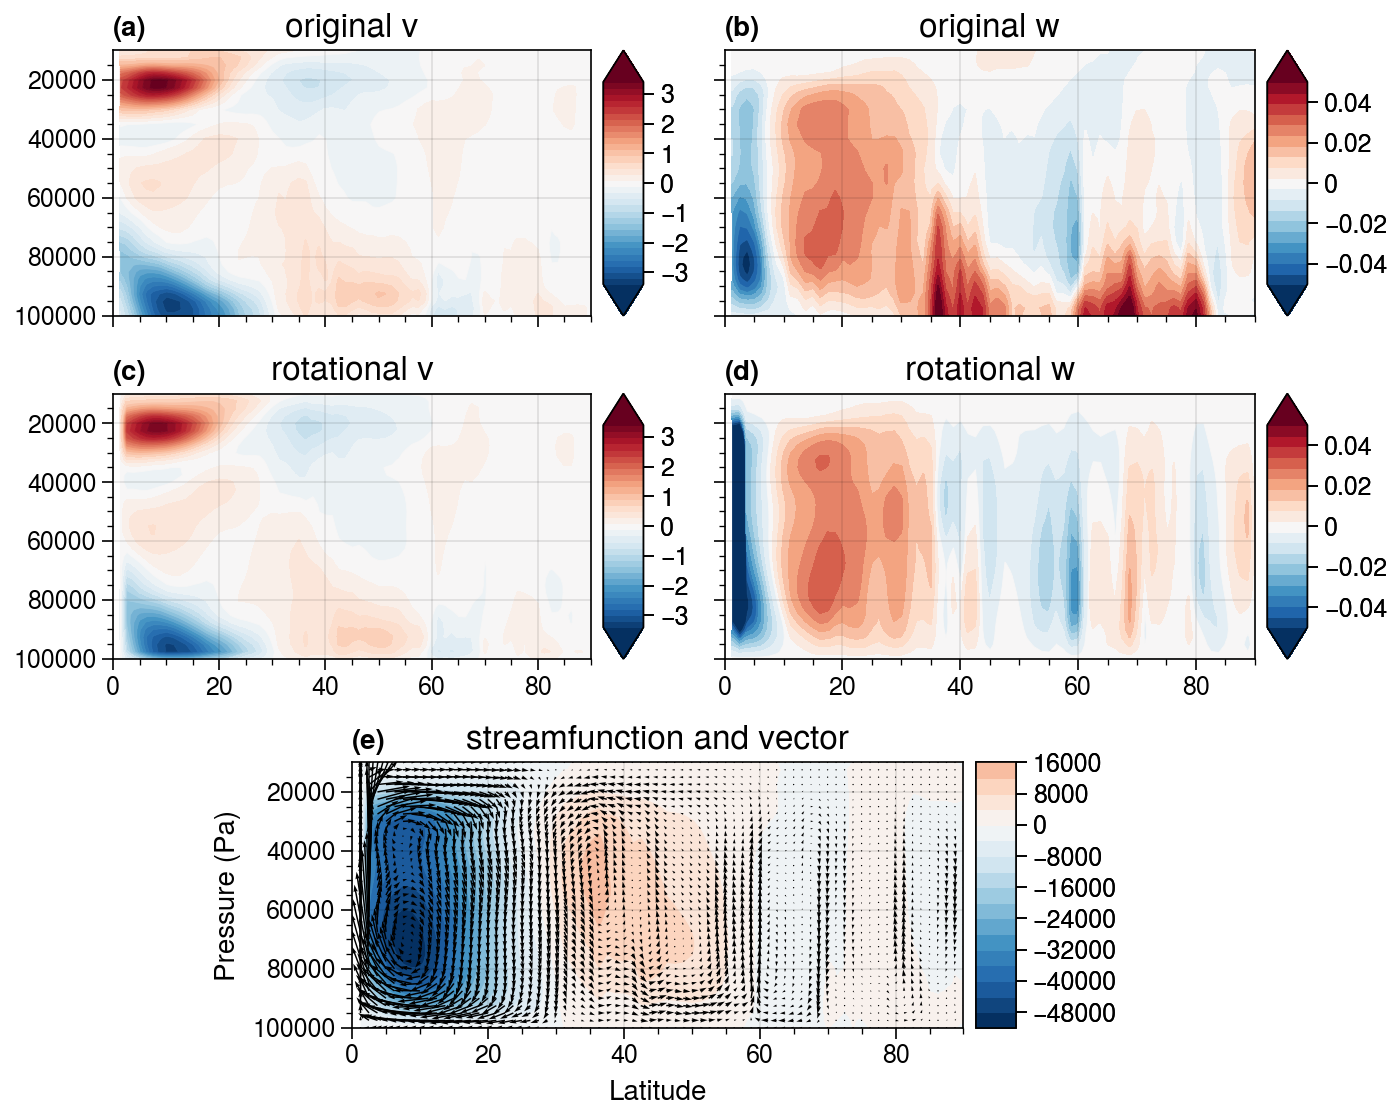

In [2]:
import proplot as pplt

array = [
    [1, 1, 2, 2],
    [3, 3, 4, 4],
    [0, 5, 5, 0],
]

fig, axes = pplt.subplots(array, figsize=(7, 5.6), sharex=3, sharey=3)

fontsize = 12

ax = axes[0]
m=ax.contourf(v, levels=np.linspace(-3.4, 3.4, 34), extend='both')
ax.colorbar(m, loc='r', label='', ticks=1)
ax.set_title('original v', fontsize=fontsize)
ax.set_ylabel('')
ax.set_xlabel('')

ax = axes[1]
m=ax.contourf(w, levels=np.linspace(-0.05, 0.05, 20), extend='both')
ax.colorbar(m, loc='r', label='', ticks=0.02)
ax.set_title('original w', fontsize=fontsize)
ax.set_ylabel('')
ax.set_xlabel('')

ax = axes[2]
m=ax.contourf(vs, levels=np.linspace(-3.4, 3.4, 34), extend='both')
ax.colorbar(m, loc='r', label='', ticks=1)
ax.set_title('rotational v', fontsize=fontsize)
ax.set_ylabel('')
ax.set_xlabel('')

ax = axes[3]
m=ax.contourf(ws, levels=np.linspace(-0.05, 0.05, 20), extend='both')
ax.colorbar(m, loc='r', label='', ticks=0.02)
ax.set_title('rotational w', fontsize=fontsize)
ax.set_ylabel('')
ax.set_xlabel('')

ax = axes[4]
m=ax.contourf(sf, levels=21)
ax.colorbar(m, loc='r', label='')
ax.quiver(vs.lat, vs.LEV, vs, ws*-50, scale=50)
ax.set_title('streamfunction and vector', fontsize=fontsize)
ax.set_ylabel('Pressure (Pa)', fontsize=fontsize-2)
ax.set_xlabel('Latitude', fontsize=fontsize-2)

axes.format(abc='(a)', xlim=[0, 90])


It is clear to see a strong tropical branch of Hadley cell, a weak Ferrel cell, and a weakest polar cell.

### 2.2 Zonal case
Here we demonstrate the zonal case, in which Walker circulation streamfunction is inverted.  We also use `FiniteDiff` to compute the vorticity in the zonal section (i.e., $j$-component of vorticity vector).

In [3]:
import xarray as xr
import numpy as np
from xinvert import invert_Poisson, cal_flow, FiniteDiff


ds = xr.open_dataset('../../../Data/atmos3D.nc')
ds['LEV'] = ds['LEV'] * 100 # hPa to Pa

u = ds.U.sel(lat=slice(10, -10)).mean('lat')
w = ds.Omega.sel(lat=slice(10, -10)).mean('lat')

fd = FiniteDiff({'Z':'LEV', 'Y':'lat', 'X':'lon'}, BCs={'Z':'fixed', 'Y':'fixed', 'X':'periodic'}, coords='lat-lon')
vor = fd.vort(u=u, w=w, components='j')

iParams = {
    'BCs'      : ['fixed', 'periodic'],
    'undef'    : np.nan,
    'mxLoop'   : 5000,
    'tolerance': 1e-13,
}

sf = invert_Poisson(vor, dims=['LEV','lon'], coords='z-lon', iParams=iParams)
us, ws = cal_flow(sf, dims=['LEV','lon'], coords='z-lon', BCs=['fixed', 'periodic'])

{} loops 4597 and tolerance is 9.588766e-14


The result can be visualized as:

C:\ProgramData\anaconda3\lib\site-packages\dask\array\core.py:1701: FutureWarning: The `numpy.column_stack` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


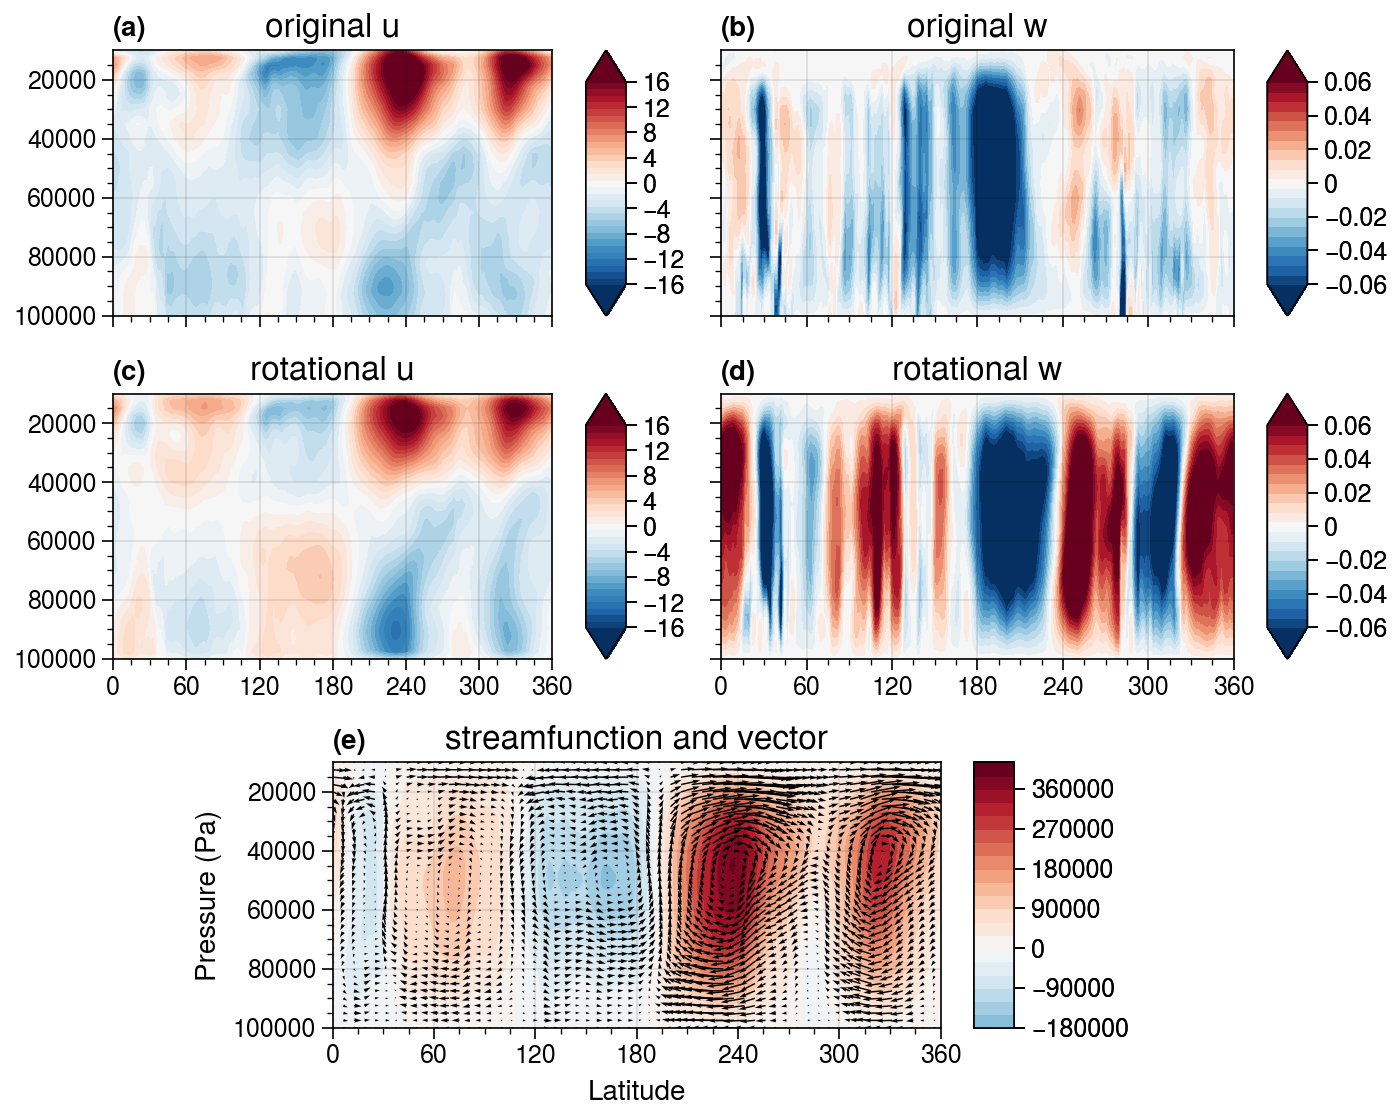

In [4]:
import proplot as pplt

array = [
    [1, 1, 2, 2],
    [3, 3, 4, 4],
    [0, 5, 5, 0],
]

fig, axes = pplt.subplots(array, figsize=(7, 5.6), sharex=3, sharey=3)

fontsize = 12

ax = axes[0]
m=ax.contourf(u, levels=np.linspace(-16, 16, 32), extend='both')
ax.colorbar(m, loc='r', label='', ticks=4)
ax.set_title('original u', fontsize=fontsize)
ax.set_ylabel('')
ax.set_xlabel('')

ax = axes[1]
m=ax.contourf(w, levels=np.linspace(-0.06, 0.06, 22), extend='both')
ax.colorbar(m, loc='r', label='', ticks=0.02)
ax.set_title('original w', fontsize=fontsize)
ax.set_ylabel('')
ax.set_xlabel('')

ax = axes[2]
m=ax.contourf(us, levels=np.linspace(-16, 16, 32), extend='both')
ax.colorbar(m, loc='r', label='', ticks=4)
ax.set_title('rotational u', fontsize=fontsize)
ax.set_ylabel('')
ax.set_xlabel('')

ax = axes[3]
m=ax.contourf(ws, levels=np.linspace(-0.06, 0.06, 22), extend='both')
ax.colorbar(m, loc='r', label='', ticks=0.02)
ax.set_title('rotational w', fontsize=fontsize)
ax.set_ylabel('')
ax.set_xlabel('')

ax = axes[4]
m=ax.contourf(sf, levels=21)
ax.colorbar(m, loc='r', label='')
ax.quiver(us.lon[::5], us.LEV, us[:,::5], ws[:,::5]*-50, scale=250)
ax.set_title('streamfunction and vector', fontsize=fontsize)
ax.set_ylabel('Pressure (Pa)', fontsize=fontsize-2)
ax.set_xlabel('Latitude', fontsize=fontsize-2)

axes.format(abc='(a)', xlim=[0, 360], xticks=np.arange(0, 361, 60))

It is clear that there is a strong upward motion at central equatorial Pacific (near dateline).  Since the boundary condition is fixed, the inverted flow cannot penetrated through the four boundaries.

---

### References
